In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ratings = pd.read_pickle("/content/drive/MyDrive/Corelli/Duke Spring 2022/AIPI 540/Recommendation Systems Module Project/data/final-data/ratings_df.pkl")
business_df = pd.read_pickle("/content/drive/MyDrive/Corelli/Duke Spring 2022/AIPI 540/Recommendation Systems Module Project/data/final-data/business_df_clean.pkl")
csmatrix = pd.read_pickle("/content/drive/MyDrive/Corelli/Duke Spring 2022/AIPI 540/Recommendation Systems Module Project/data/final-data/csmatrix.pkl")
restaurants_df = pd.read_pickle("/content/drive/MyDrive/Corelli/Duke Spring 2022/AIPI 540/Recommendation Systems Module Project/data/final-data/restaurants_df.pkl")

In [ ]:
test = pd.merge(ratings, business_df, how = "left", on="business_id")
test

,business_id,user_id,review_stars,name,address,city,state,postal_code,stars,review_count,categories
0,eEOYSgkmpB90uNA7lDOMRA,nnu9h6du4E6oqMasPgKR3Q,5,Vietnamese Food Truck,,Tampa Bay,FL,33602,4.0,10,"Vietnamese, Food, Restaurants, Food Trucks"
1,eEOYSgkmpB90uNA7lDOMRA,JlEdjZvhAbFCU-ObZQb1lw,5,Vietnamese Food Truck,,Tampa Bay,FL,33602,4.0,10,"Vietnamese, Food, Restaurants, Food Trucks"
2,eEOYSgkmpB90uNA7lDOMRA,P1ccUaz-s3kumq3RHnOLvg,3,Vietnamese Food Truck,,Tampa Bay,FL,33602,4.0,10,"Vietnamese, Food, Restaurants, Food Trucks"
3,0bPLkL0QhhPO5kt1_EXmNQ,z1Dfj8kz3KCArkXaIyaBIA,1,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,4.5,100,"Food, Delis, Italian, Bakeries, Restaurants"
4,0bPLkL0QhhPO5kt1_EXmNQ,HvgKiuV36e9SzNqeA5zOfA,4,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,4.5,100,"Food, Delis, Italian, Bakeries, Restaurants"
...,...,...,...,...,...,...,...,...,...,...,...
856479,esBGrrmuZzSiECyRBoKvvA,E2uJ62_uEUu5wz2EnZ9CgA,2,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,33701,4.5,38,"Bars, Beer Bar, Nightlife, Wine Bars, Pizza, R..."
856480,esBGrrmuZzSiECyRBoKvvA,8aE275qBmEVUjb_nrE65CQ,5,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,33701,4.5,38,"Bars, Beer Bar, Nightlife, Wine Bars, Pizza, R..."
856481,esBGrrmuZzSiECyRBoKvvA,4wMvgdEVpFLCIhFANNBvGA,5,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,33701,4.5,38,"Bars, Beer Bar, Nightlife, Wine Bars, Pizza, R..."
856482,esBGrrmuZzSiECyRBoKvvA,mbIemu2trEjtn8viGHD3dA,5,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,33701,4.5,38,"Bars, Beer Bar, Nightlife, Wine Bars, Pizza, R..."


In [ ]:
ratings = test

In [ ]:
unique_business_ids = ratings["business_id"].unique()
unique_business_ids

test_dict = {}

for i in range(len(unique_business_ids)):
    test_dict[unique_business_ids[i]] = i

In [ ]:
unique_user_ids = ratings["user_id"].unique()
unique_user_ids

user_id_dict = {}

for i in range(len(unique_user_ids)):
    user_id_dict[unique_user_ids[i]] = i

In [ ]:
ratings["user_id"] = ratings["user_id"].map(user_id_dict)
ratings["business_id"] = ratings["business_id"].map(test_dict)
ratings

,business_id,user_id,review_stars,name,address,city,state,postal_code,stars,review_count,categories
0,0,0,5,Vietnamese Food Truck,,Tampa Bay,FL,33602,4.0,10,"Vietnamese, Food, Restaurants, Food Trucks"
1,0,1,5,Vietnamese Food Truck,,Tampa Bay,FL,33602,4.0,10,"Vietnamese, Food, Restaurants, Food Trucks"
2,0,2,3,Vietnamese Food Truck,,Tampa Bay,FL,33602,4.0,10,"Vietnamese, Food, Restaurants, Food Trucks"
3,1,3,1,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,4.5,100,"Food, Delis, Italian, Bakeries, Restaurants"
4,1,4,4,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,4.5,100,"Food, Delis, Italian, Bakeries, Restaurants"
...,...,...,...,...,...,...,...,...,...,...,...
856479,10862,44036,2,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,33701,4.5,38,"Bars, Beer Bar, Nightlife, Wine Bars, Pizza, R..."
856480,10862,56094,5,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,33701,4.5,38,"Bars, Beer Bar, Nightlife, Wine Bars, Pizza, R..."
856481,10862,88166,5,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,33701,4.5,38,"Bars, Beer Bar, Nightlife, Wine Bars, Pizza, R..."
856482,10862,182915,5,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,33701,4.5,38,"Bars, Beer Bar, Nightlife, Wine Bars, Pizza, R..."


In [ ]:
encoder = LabelEncoder()
encoder.fit(ratings['categories'])
ratings['categories'] = encoder.transform(ratings['categories'])
ratings

,business_id,user_id,review_stars,name,address,city,state,postal_code,stars,review_count,categories
0,0,0,5,Vietnamese Food Truck,,Tampa Bay,FL,33602,4.0,10,7542
1,0,1,5,Vietnamese Food Truck,,Tampa Bay,FL,33602,4.0,10,7542
2,0,2,3,Vietnamese Food Truck,,Tampa Bay,FL,33602,4.0,10,7542
3,1,3,1,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,4.5,100,2972
4,1,4,4,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,4.5,100,2972
...,...,...,...,...,...,...,...,...,...,...,...
856479,10862,44036,2,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,33701,4.5,38,724
856480,10862,56094,5,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,33701,4.5,38,724
856481,10862,88166,5,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,33701,4.5,38,724
856482,10862,182915,5,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,33701,4.5,38,724


In [ ]:
ratings = ratings[["user_id","business_id","categories","review_stars"]]
ratings

,user_id,business_id,categories,review_stars
0,0,0,7542,5
1,1,0,7542,5
2,2,0,7542,3
3,3,1,2972,1
4,4,1,2972,4
...,...,...,...,...
856479,44036,10862,724,2
856480,56094,10862,724,5
856481,88166,10862,724,5
856482,182915,10862,724,5


In [ ]:
X = ratings.drop(labels=["review_stars"],axis=1)
y = ratings["review_stars"]

X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=0, test_size=0.2)

# Put data into PyTorch dataloaders

In [ ]:
def prep_dataloaders(X_train,y_train,X_val,y_val,batch_size):
    # Convert training and test data to TensorDatasets
    trainset = TensorDataset(torch.from_numpy(np.array(X_train)).long(), 
                            torch.from_numpy(np.array(y_train)).float())
    valset = TensorDataset(torch.from_numpy(np.array(X_val)).long(), 
                            torch.from_numpy(np.array(y_val)).float())

    # Create Dataloaders for our training and test data to allow us to iterate over minibatches 
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
    valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False)

    return trainloader, valloader

batchsize = 64
trainloader,valloader = prep_dataloaders(X_train,y_train,X_val,y_val,batchsize)

# Define model architecture

In [ ]:
class NNHybridFiltering(nn.Module):
    
    def __init__(self, n_users, n_items, n_genres, embdim_users, embdim_items, embdim_genres, n_activations, rating_range):
        super().__init__()
        self.user_embeddings = nn.Embedding(num_embeddings=n_users,embedding_dim=embdim_users)
        self.item_embeddings = nn.Embedding(num_embeddings=n_items,embedding_dim=embdim_items)
        self.genre_embeddings = nn.Embedding(num_embeddings=n_genres,embedding_dim=embdim_genres)
        self.fc1 = nn.Linear(embdim_users+embdim_items+embdim_genres,n_activations)
        self.fc2 = nn.Linear(n_activations,1)
        self.rating_range = rating_range

    def forward(self, X):
        # Get embeddings for minibatch
        embedded_users = self.user_embeddings(X[:,0])
        embedded_items = self.item_embeddings(X[:,1])
        embedded_genres = self.genre_embeddings(X[:,2])
        # Concatenate user, item and genre embeddings
        embeddings = torch.cat([embedded_users,embedded_items,embedded_genres],dim=1)
        # Pass embeddings through network
        preds = self.fc1(embeddings)
        preds = F.relu(preds)
        preds = self.fc2(preds)
        # Scale predicted ratings to target-range [low,high]
        preds = torch.sigmoid(preds) * (self.rating_range[1]-self.rating_range[0]) + self.rating_range[0]
        return preds

In [ ]:
def train_model(model, criterion, optimizer, dataloaders, device, num_epochs=5, scheduler=None):
    model = model.to(device) # Send model to GPU if available
    since = time.time()

    costpaths = {'train':[],'val':[]}

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0

            # Get the inputs and labels, and send to GPU if available
            for (inputs,labels) in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the weight gradients
                optimizer.zero_grad()

                # Forward pass to get outputs and calculate loss
                # Track gradient only for training data
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model.forward(inputs).view(-1)
                    loss = criterion(outputs, labels)

                    # Backpropagation to get the gradients with respect to each weight
                    # Only if in train
                    if phase == 'train':
                        loss.backward()
                        # Update the weights
                        optimizer.step()

                # Convert loss into a scalar and add it to running_loss
                running_loss += np.sqrt(loss.item()) * labels.size(0)

            # Step along learning rate scheduler when in train
            if (phase == 'train') and (scheduler is not None):
                scheduler.step()

            # Calculate and display average loss and accuracy for the epoch
            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            costpaths[phase].append(epoch_loss)
            print('{} loss: {:.4f}'.format(phase, epoch_loss))

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))

    return costpaths

In [ ]:
# Train the model
dataloaders = {'train':trainloader, 'val':valloader}
n_users = X['user_id'].max()+1
n_items = X['business_id'].max()+1
n_genres = X['categories'].max()+1
model = NNHybridFiltering(n_users,
                       n_items,
                       n_genres,
                       embdim_users=50, 
                       embdim_items=50, 
                       embdim_genres=25,
                       n_activations = 100,
                       rating_range=[0.,5.])
criterion = nn.MSELoss()
lr=0.001
n_epochs=6
wd=1e-3
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

cost_paths = train_model(model,criterion,optimizer,dataloaders, device,n_epochs, scheduler=None)

Epoch 0/5
----------
train loss: 1.3311
val loss: 1.2864
Epoch 1/5
----------
train loss: 1.2679
val loss: 1.2703
Epoch 2/5
----------
train loss: 1.2487
val loss: 1.2680
Epoch 3/5
----------
train loss: 1.2439
val loss: 1.2653
Epoch 4/5
----------
train loss: 1.2431
val loss: 1.2646
Epoch 5/5
----------
train loss: 1.2435
val loss: 1.2650
Training complete in 3m 48s


# 1.2645 RMSE

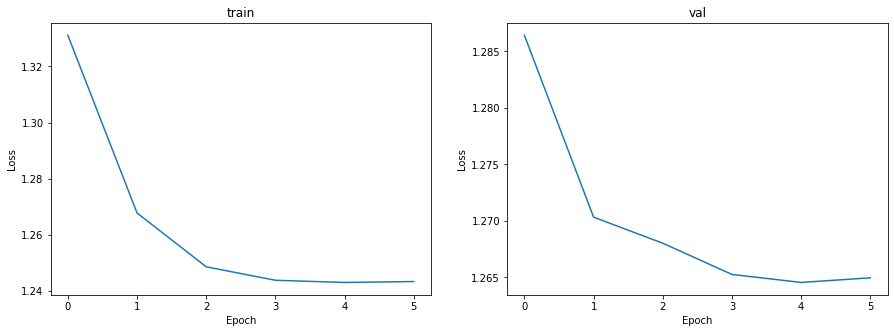

In [ ]:
# Plot the cost over training and validation sets
fig,ax = plt.subplots(1,2,figsize=(15,5))
for i,key in enumerate(cost_paths.keys()):
    ax_sub=ax[i%3]
    ax_sub.plot(cost_paths[key])
    ax_sub.set_title(key)
    ax_sub.set_xlabel('Epoch')
    ax_sub.set_ylabel('Loss')
plt.show()

In [ ]:
def predict_rating(model, user_id, business_id, category, encoder, device):
    # Encode genre
    try:
      category = encoder.transform(np.array(category).reshape(-1))
    except:
      category = category
    # Get predicted rating
    model = model.to(device)
    with torch.no_grad():
        model.eval()
        X = torch.Tensor([user_id,business_id,category]).long().view(1,-1)
        X = X.to(device)
        pred = model.forward(X)
        return pred

# Get the predicted rating for a random user-item pair
rating = predict_rating(model,user_id=5,business_id=10,category='Vietnamese, Food, Restaurants, Food Trucks',encoder=encoder, device=device)
print('Predicted rating is {:.1f}'.format(rating.detach().cpu().item()))

Predicted rating is 4.3


In [ ]:
ratings

,user_id,business_id,categories,review_stars
0,0,0,7542,5
1,1,0,7542,5
2,2,0,7542,3
3,3,1,2972,1
4,4,1,2972,4
...,...,...,...,...
856479,44036,10862,724,2
856480,56094,10862,724,5
856481,88166,10862,724,5
856482,182915,10862,724,5


In [ ]:
def generate_recommendations(ratings,business_df,X,model,user_id,encoder,device):
    # Get predicted ratings for every restaurant
    pred_ratings = []
    for business in ratings['business_id'].tolist():
        category = ratings.loc[ratings['business_id']==business,'categories'].unique()
        pred = predict_rating(model,user_id,business,category,encoder,device)
        pred_ratings.append(pred.detach().cpu().item())
    # Sort restaurants by predicted rating
    idxs = np.argsort(np.array(pred_ratings))[::-1]
    recs = ratings.iloc[idxs]['business_id'].values.tolist()


    # Filter out restaurants already visited by user
    restaurants_visited = X.loc[X['user_id']==user_id, 'business_id'].tolist()
    recs = [rec for rec in recs if not rec in restaurants_visited]
   

    # Filter to top 10 recommendations
    recs = recs[:10]
    # Convert movieIDs to titles
    
    # recs_names = []
    # for rec in recs:
    #     recs_names.append(movies.loc[movies['business_id']==rec,'name'].values[0])
    # return recs_names

    rec_nums = []
    rec_names = []
    total_stars = []
    total_reviews = []

    for rec in recs:
        rec_nums.append(ratings.loc[ratings['business_id']==rec,'business_id'].values[0])

    for i in range(10):
      rec_names.append(business_df[business_df["business_id"]==list(test_dict.keys())[list(test_dict.values()).index(rec_nums[i])]]["name"].values[0])
      total_stars.append(business_df[business_df["business_id"] == list(test_dict.keys())[list(test_dict.values()).index(rec_nums[i])]]["stars"].values[0])
      total_reviews.append(business_df[business_df["business_id"] == list(test_dict.keys())[list(test_dict.values()).index(rec_nums[i])]]["review_count"].values[0])
      
    
    return rec_names, total_stars, total_reviews

In [ ]:
user_id = 5
recs, stars, total_reviews = generate_recommendations(ratings.sample(50),business_df,X,model,user_id,encoder,device)
for i,rec in enumerate(recs):
  print('Recommendation {}: {}, {} stars, {} total reviews'.format(i+1,rec,stars[i],total_reviews[i]))

Recommendation 1: Los Comparres, 4.5 stars, 339 total reviews
Recommendation 2: Shelly's Cafe, 4.5 stars, 399 total reviews
Recommendation 3: Pia's Trattoria, 4.5 stars, 709 total reviews
Recommendation 4: Ahi Asian Bistro, 4.5 stars, 153 total reviews
Recommendation 5: Sushi Maru, 4.5 stars, 435 total reviews
Recommendation 6: Six Ten Brewing, 4.5 stars, 132 total reviews
Recommendation 7: The Nona Slice House, 4.5 stars, 196 total reviews
Recommendation 8: Rusty Bellies, 4.5 stars, 1421 total reviews
Recommendation 9: On Swann, 4.5 stars, 1291 total reviews
Recommendation 10: La Cabaña Del Tio, 4.0 stars, 160 total reviews
